### Can we predict whether someone will survive or die on the Titanic?

![title](./img/survive.png)

_I predict the man in the water will die and the girl will not, no machine learning needed!_

We are going to use machine learning, lets load our data set

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/sik-flow/Data/master/Titanic_Data.csv')
displadf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Columns are as follows:

1. PassengerId - Unique ID for each passenger
2. Survived - Whether they survived or not (1 = They survied; 0 = They did not survive)
3. Pclass - Passenger Class (1 = 1st Class; 2 = 2nd Class; 3rd Class)
4. Name - Name of Passenger
4. Sex - Gender
5. Age - Age in Years
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin 
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southhampton)

Lets try to predict based on these features, if someone survives or not! 

To start we'll do some basic data cleaning.  We'll first remove PassengerID because we know that does not provide any value and will only confuse the model.

In [7]:
df.drop('PassengerId', inplace = True, axis = 1)

Now lets make Sex into a binary feature.  This is necessary because the model we will be useing can not process features that are text.

In [10]:
df['Sex'] = np.where(df['Sex'] == 'male', 1, 0)

In [11]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Now lets make our X and y data.  Our data is what we our model is going to be training on (Pclass, Sex, Sibsp, Parch, Fare, and Age) and y is the target variable (survived).

In [73]:
X = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age']]
y = df['Survived']

display(X.head())

,Pclass,Sex,SibSp,Parch,Fare,Age
0,3,1,1,0,7.2500,22.0
1,1,0,1,0,71.2833,38.0
2,3,0,0,0,7.9250,26.0
3,1,0,1,0,53.1000,35.0
4,3,1,0,0,8.0500,35.0


In [19]:
X.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Age       177
dtype: int64

We have some missing values in the age column, we will need to fill those in.  I am going to fill that in with the median age.  

In [20]:
X['Age'].fillna(value = X['Age'].median(), inplace = True)

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Before we go into a modeling, we need a baseline to see if our model does any good.  For this problem, our baseline is going to be if we predict everything will be the dominant class (which is everyone passes away).

In [21]:
max(df[df['Survived'] == 0]['Survived'].count() / df['Survived'].count(), 
    df[df['Survived'] == 0]['Survived'].count() / df['Survived'].count())

0.61616161616161613

If we predict that everyone in this dataset dies, we will end up with 62% accuracy.  Now lets see if we can use machine learning to improve this score. 

I am going to use the Random Forest Classifier to                           

In [22]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X, y).score(X, y)

0.96184062850729513

Our model was 96% accurate, awesome work everyone!  Lets see what the confusion matrix looks like to see how we are doing.  

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = clf.fit(X, y).predict(X)
m = confusion_matrix(y, y_pred, labels=[True, False])
col_labels=['Predicted_Survived', 'Predicted_Died']
in_labels = ['Survived', 'Died']
df_confusion = pd.DataFrame(m, index = in_labels, columns = col_labels)
df_confusion

,Predicted_Survived,Predicted_Died
Survived,327,15
Died,8,541


Our confusion matrix looks very good as well only had 23 misclassifications.  I think we can say that we have solved this problem.

![title](./img/corso.png)

After evaluating the classifier we have 96% accuracy and the confusion matrix looks good, but the only data we tested on the model has already seen.  

If you are a teacher and want to test your students on how well they know a concept, you are not going to give the class the the questions and answers the night before.  If you do the scores are, more than likely, going to be higher than what the class truly knows because they will have memorized the questions.  Since you are a good teacher, you want to test to see what they actually know about the concepts and not what they can memorize.  In machine learning, we want to see how well our model can do on unseen data (unseen questions for the students).  To accomplish this we need to break our data into a train and test data sets.

Lets do it!

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 11)

In [62]:
print ('X Size: {}'.format(X.shape))
print ('Y Size: {}'.format(y.shape))
print ('X_Train Size: {}'.format(X_train.shape))
print ('X_Test Size: {}'.format(X_test.shape))
print ('Y_Train Size: {}'.format(y_train.shape))
print ('Y_Test Size: {}'.format(y_test.shape))

X Size: (891, 6)
Y Size: (891,)
X_Train Size: (668, 6)
X_Test Size: (223, 6)
Y_Train Size: (668,)
Y_Test Size: (223,)


![title](./img/allrighty.png)

I split the data and will train on 75% of the data and will test on 25% of the data.  Originally we trained and tested on all 891 rows, this time we will train on 668 rows and then test on 223 rows.  

Going back to the teacher analogy, the teacher is going to have the class take a test.  Instead of giving them all the problems and answers before, he/she gives them 668 practice problems and then tests them on 223 problems they have never seen before.

Now lets train on 668 rows and test on the 223 rows and see how our accuracy looks.

In [63]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.84304932735426008

Sooooo, our accuracy went down from 96% to 83%.  But this is more representative of what our algorithm actually knows.  There are plenty of ways to improve this accuracy. 

To start, lets look at the feature importance of all the features.  The great thing about the Random Forest Algorithm is we can easily get the most important features.

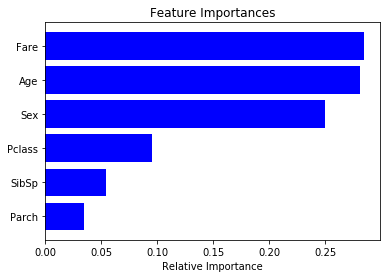

In [64]:
features = X.columns.tolist()
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Age, gender, and fare are the most important features in our dataset. 

![Women and Children First!](./img/women_children.png)

This is a problem, if you remember we had 177 rows where the age was missing and we filled those values in with the median value of age.  There is probably a better way to do this.  

Lets take a look at the original dataset again. 

In [65]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


Lets grab the title and see if there is any relationship between title and age, to see if we can come up with a better estimate of age. 

In [66]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')

df['Title'].value_counts()

/Users/jeffreyherman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Lady          1
Ms            1
Don           1
Capt          1
Countess      1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

There are a lot more titles than I was expecting.  I am going to bin some of the titles together that are similar and only have a few individuals.

In [67]:
# Officer Bin
df['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

# Aristocrat Bin
df['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', 
                    inplace = True)

# Replace Mlle, Ms with Miss and Mme with Mrs
df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [68]:
df.groupby('Title')['Age'].median()

Title
Aristocrat    40.0
Master         4.0
Miss          18.0
Mr            28.0
Mrs           35.0
Officer       50.0
Name: Age, dtype: float64

Now we can see there are differences in age based on the title.  Next I want to see if there is differences in age by title and class.  My theory is that people in first class are older and people in lower classes are on average younger.

In [69]:
df.groupby(['Title', 'Pclass'])['Age'].median()

Title       Pclass
Aristocrat  1         40.0
Master      1          4.0
            2          1.0
            3          4.0
Miss        1         30.0
            2         24.0
            3         18.0
Mr          1         40.0
            2         31.0
            3         26.0
Mrs         1         40.0
            2         32.0
            3         31.0
Officer     1         50.0
            2         46.5
Name: Age, dtype: float64

Looks like my theory was correct!  I am going to input the missing age values based on the individuals title and Pclass.  

In [70]:
df['Age'] = df.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

All right.  Now that we filled in the missing age values with a better method, lets see if that had an impact on our model.  

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 11)

clf.fit(X_train, y_train).score(X_test, y_test)

0.84753363228699552

In [72]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr


We saw a slight improvement by filling in the missing values with a different technique.  By performing feature engineering on more of the features.  Ideas could include:

- Dummy coding Pclass
- Binning age and then dummy coding that
- Using SibSp and Parch to create a new feature based on family size
- Binning Fare and then dummy coding that
- Duummy coding Title

Additional gains could be achieved tuning the parameters of the random forest algorithm.